[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and ultralytics:

In [ ]:
!pip install -U torch sahi ultralytics

In [1]:
import os
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image
#os.getcwd()

- Import required modules:

In [ ]:
# arrange an instance segmentation model for test
# from sahi.utils.yolov8 import (
#     download_yolov8s_model, download_yolov8s_seg_model
# )



- Download a yolov8 model and two test images:

In [2]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov8_model_path = "/mnt/new/weights/train/weights/best.pt"
# download_yolov8s_model(yolov8_model_path)

# download test images into demo_data folder
# download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
# download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv8 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [3]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cuda:0", # or 'cuda:0'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [4]:
result = get_prediction("/mnt/new/needle_images/27515.jpg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [32]:
result = get_prediction(read_image("/mnt/new/needle_images/27506.jpg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

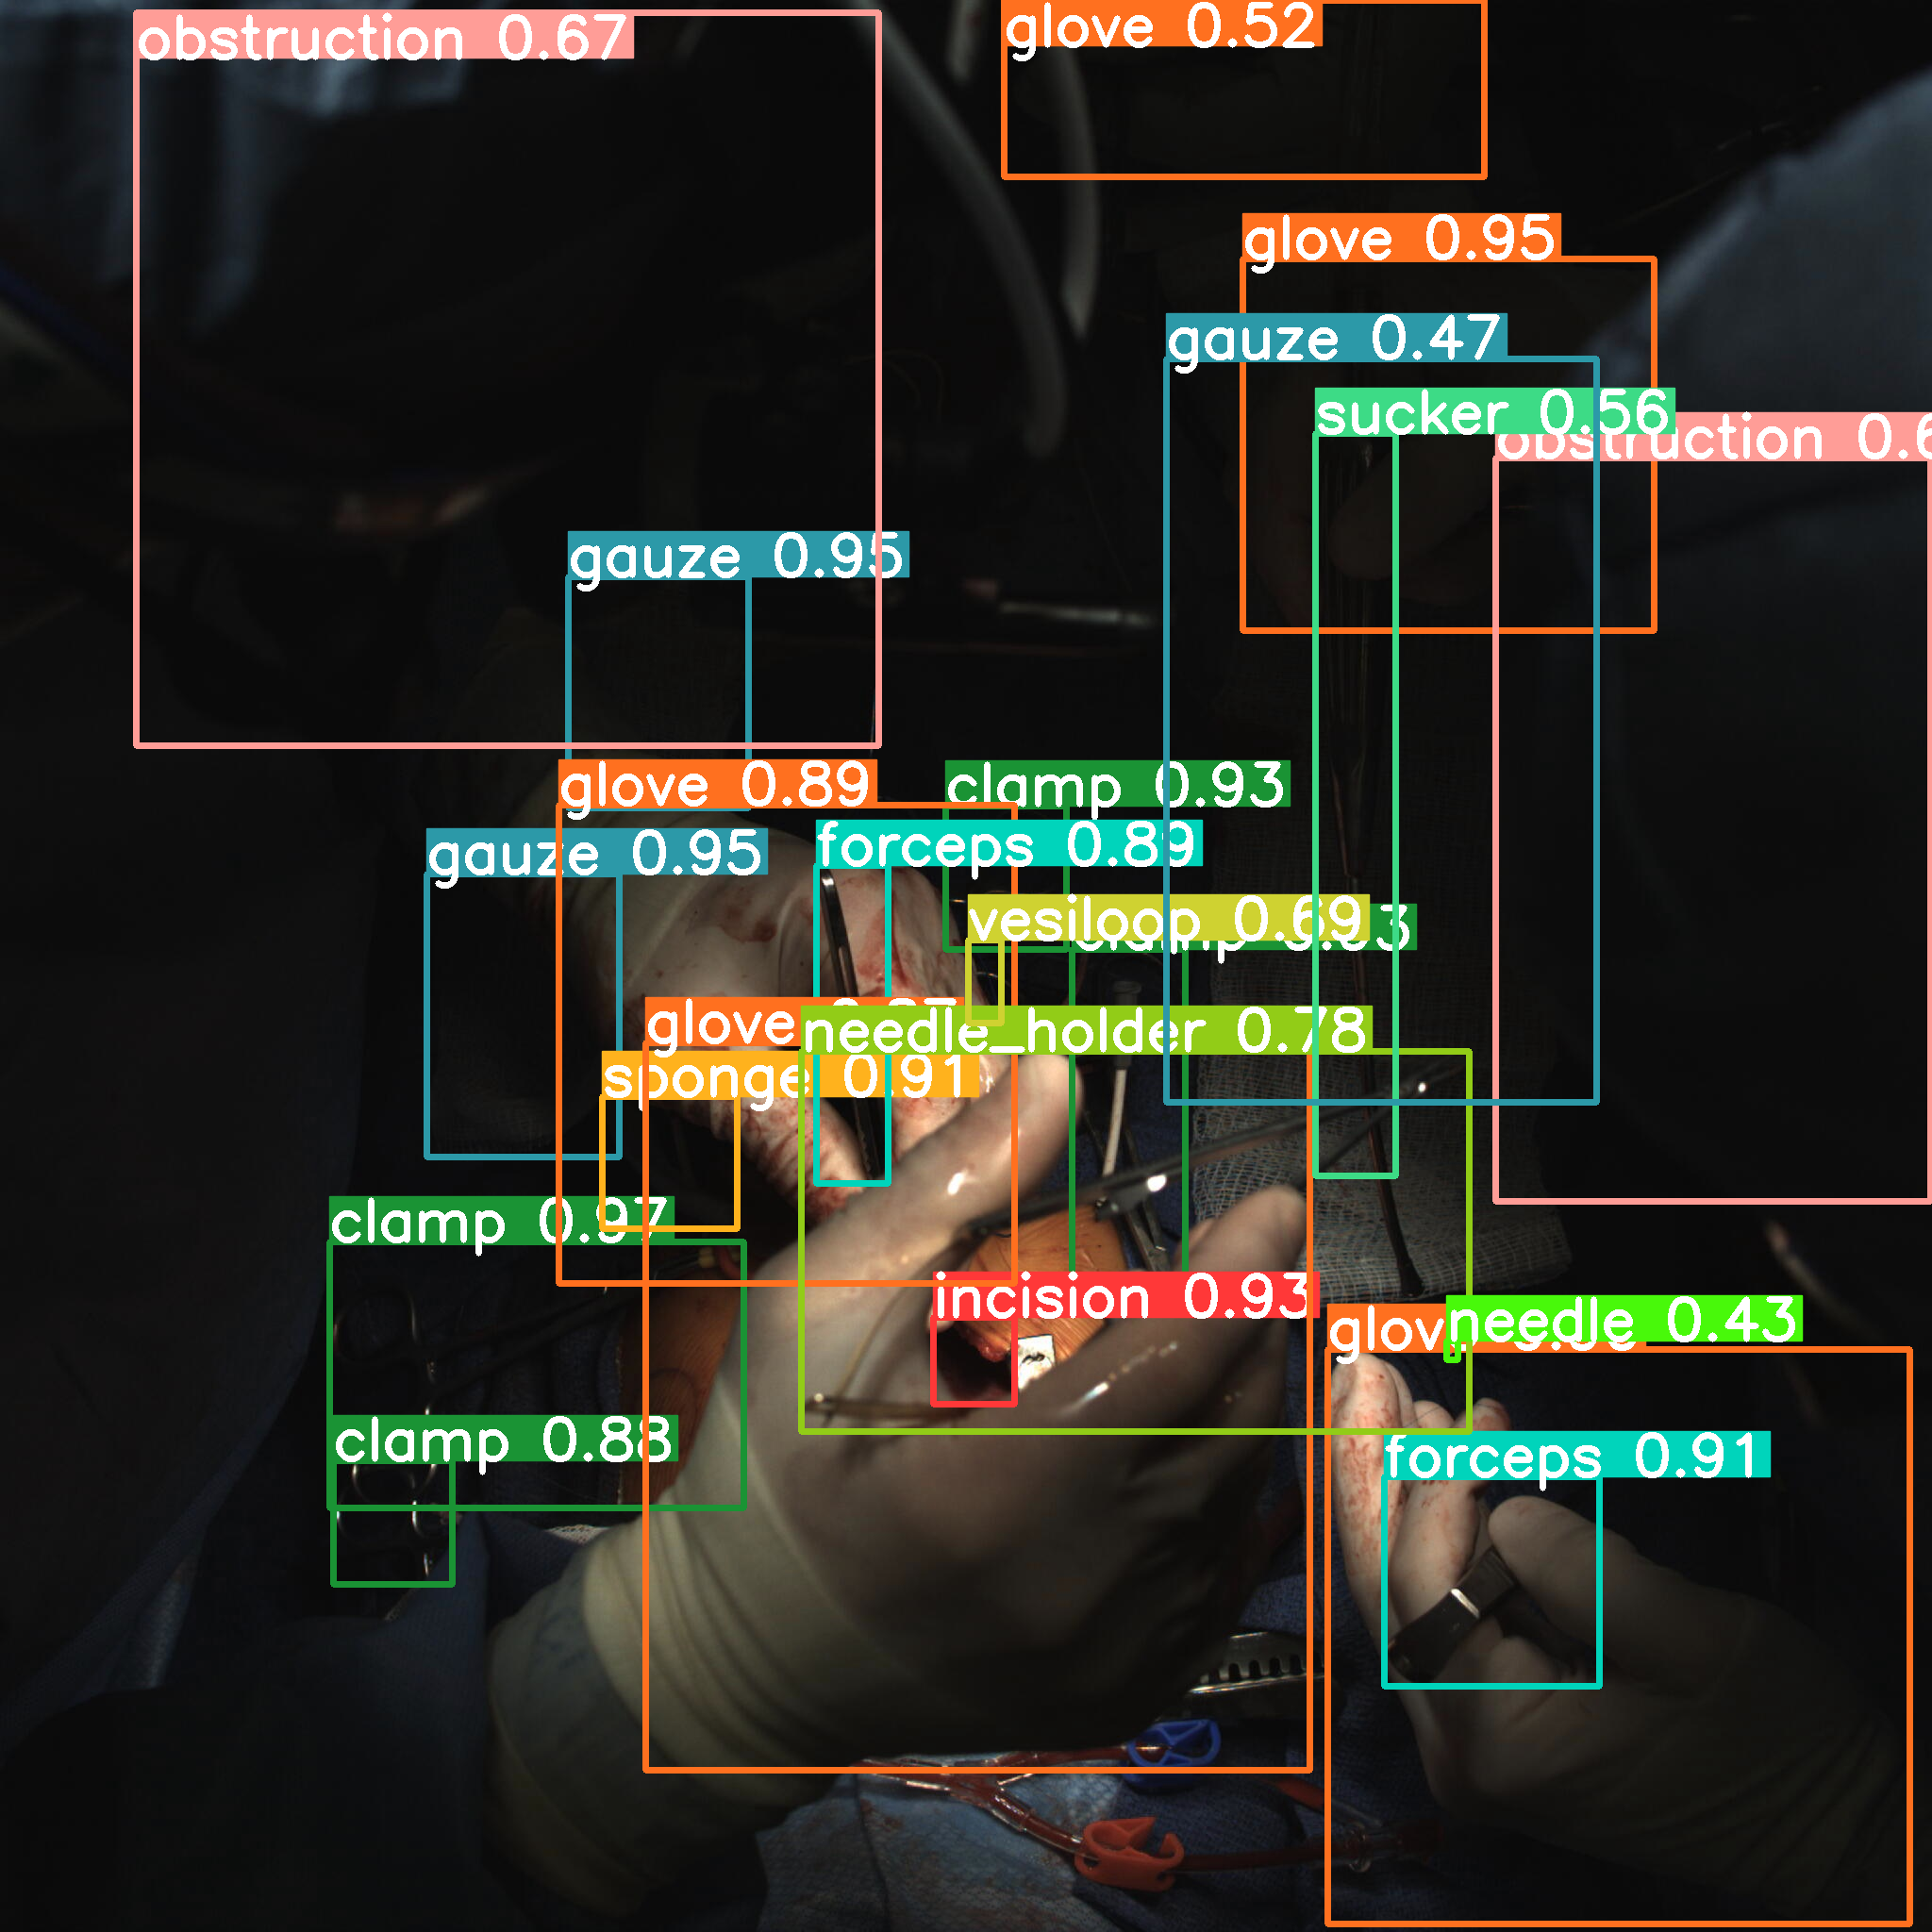

In [33]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv8 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [36]:
result = get_sliced_prediction(
    "/mnt/new/needle_images/27505.jpg",
    detection_model,
    slice_height = 1024,
    slice_width = 1024,
    overlap_height_ratio = 0.1,
    overlap_width_ratio = 0.1
)

Performing prediction on 9 slices.


- Visualize predicted bounding boxes and masks over the original image:

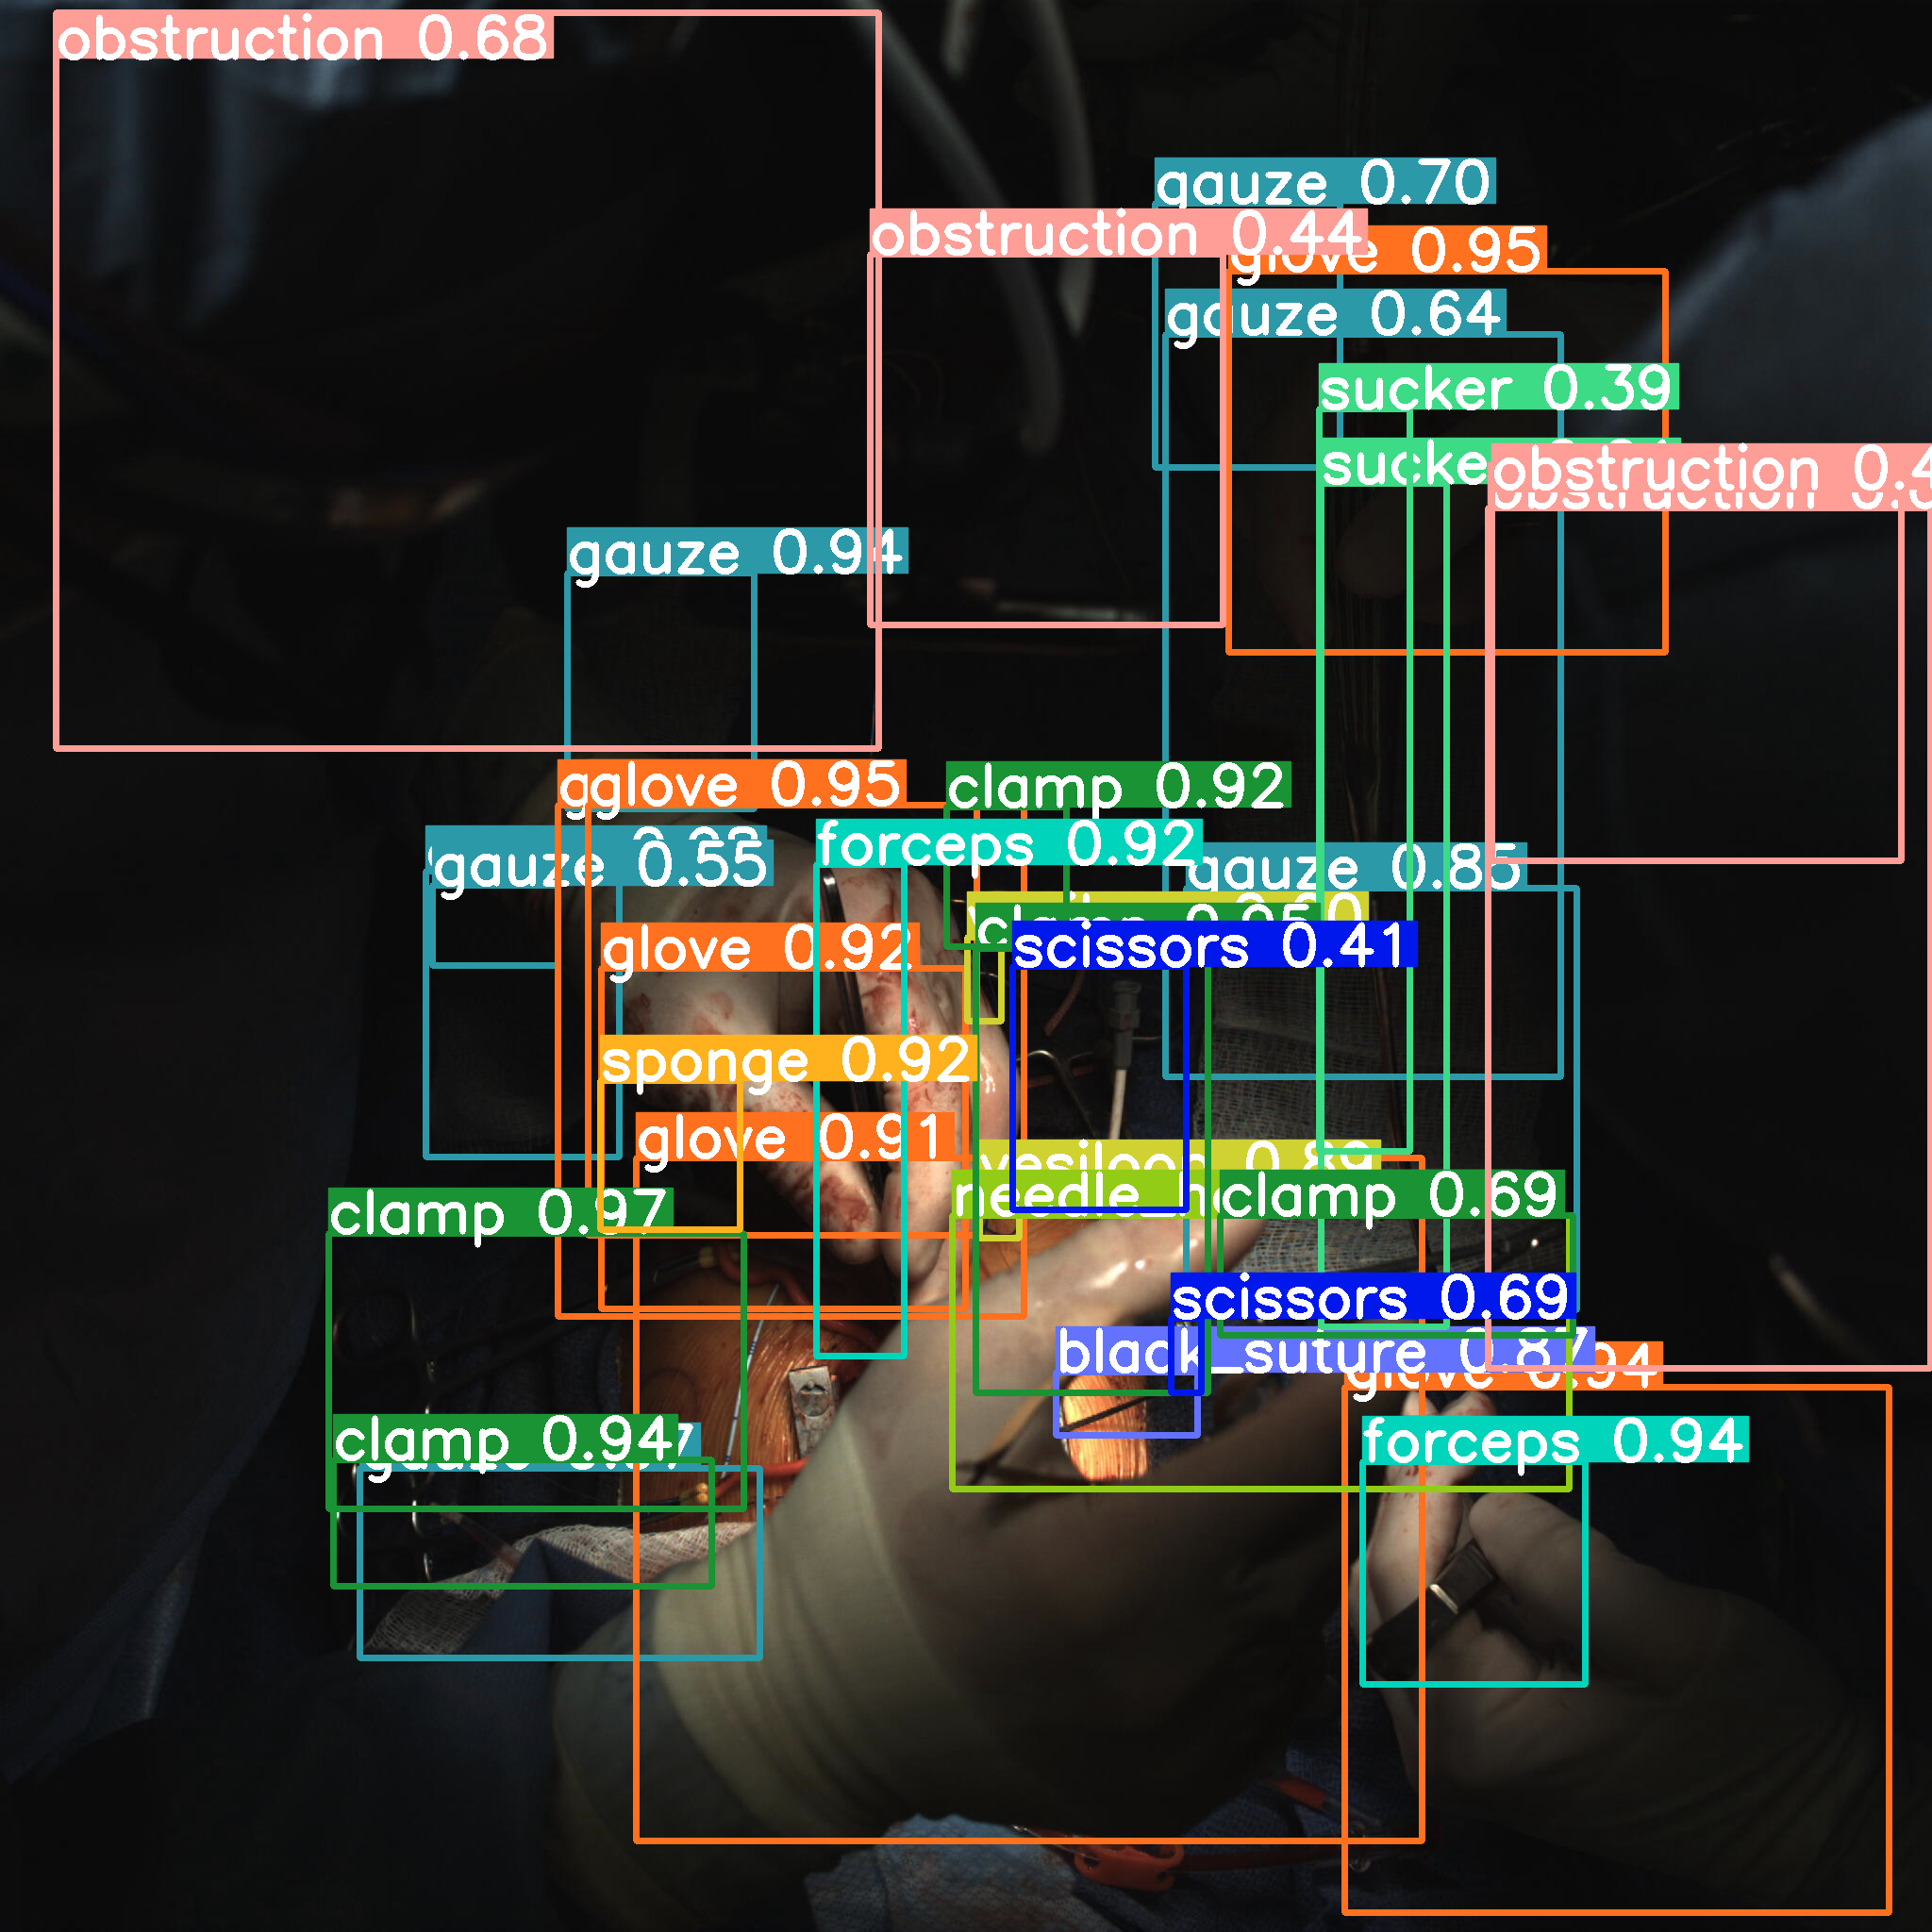

In [37]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [13]:
object_prediction_list = result.object_prediction_list

In [14]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(382.78946, 1611.8846, 805.2653, 1757.76), w: 422.4758605957031, h: 145.8753662109375>,
    mask: None,
    score: PredictionScore: <value: 0.9725673198699951>,
    category: Category: <id: 1, name: gauze>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [15]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [382.7894592285156,
   1611.8846435546875,
   422.4758605957031,
   145.8753662109375],
  'score': 0.9725673198699951,
  'category_id': 1,
  'category_name': 'gauze',
  'segmentation': [],
  'iscrowd': 0,
  'area': 61628},
 {'image_id': None,
  'bbox': [601.58154296875,
   611.7682495117188,
   193.39715576171875,
   244.41937255859375],
  'score': 0.9380874633789062,
  'category_id': 1,
  'category_name': 'gauze',
  'segmentation': [],
  'iscrowd': 0,
  'area': 47270},
 {'image_id': None,
  'bbox': [451.7684326171875,
   923.9381103515625,
   204.20916748046875,
   301.677490234375],
  'score': 0.9169678688049316,
  'category_id': 1,
  'category_name': 'gauze',
  'segmentation': [],
  'iscrowd': 0,
  'area': 61605}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [16]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [382.7894592285156,
   1611.8846435546875,
   422.4758605957031,
   145.8753662109375],
  'score': 0.9725673198699951,
  'category_id': 1,
  'category_name': 'gauze',
  'segmentation': [],
  'iscrowd': 0,
  'area': 61628},
 {'image_id': 1,
  'bbox': [601.58154296875,
   611.7682495117188,
   193.39715576171875,
   244.41937255859375],
  'score': 0.9380874633789062,
  'category_id': 1,
  'category_name': 'gauze',
  'segmentation': [],
  'iscrowd': 0,
  'area': 47270},
 {'image_id': 1,
  'bbox': [451.7684326171875,
   923.9381103515625,
   204.20916748046875,
   301.677490234375],
  'score': 0.9169678688049316,
  'category_id': 1,
  'category_name': 'gauze',
  'segmentation': [],
  'iscrowd': 0,
  'area': 61605}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [17]:
result.to_imantics_annotations()[:3]

ImportError: Please run "pip install -U imantics" to install imantics first for imantics conversion.

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
result.to_fiftyone_detections()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [ ]:
model_type = "yolov8"
model_path = yolov8_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|                                                | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  33%|█████████████▎                          | 1/3 [00:01<00:03,  1.88s/it]

Prediction time is: 1743.90 ms
Performing prediction on 15 slices.


Performing inference on images:  67%|██████████████████████████▋             | 2/3 [00:03<00:01,  1.80s/it]

Prediction time is: 1679.39 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|████████████████████████████████████████| 3/3 [00:05<00:00,  1.99s/it]

Prediction time is: 2228.20 ms
Prediction results are successfully exported to runs/predict/exp8


# 0.6 Segmentation

Run above examples for segmentation model.

In [ ]:
#download YOLOV8S model to 'models/yolov8s.pt'
yolov8_seg_model_path = "models/yolov8s-seg.pt"
download_yolov8s_seg_model(yolov8_seg_model_path)

In [ ]:
detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_seg_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

In [ ]:
im = read_image("demo_data/small-vehicles1.jpeg")
h = im.shape[0]
w = im.shape[1]

result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model_seg, full_shape=(h, w))

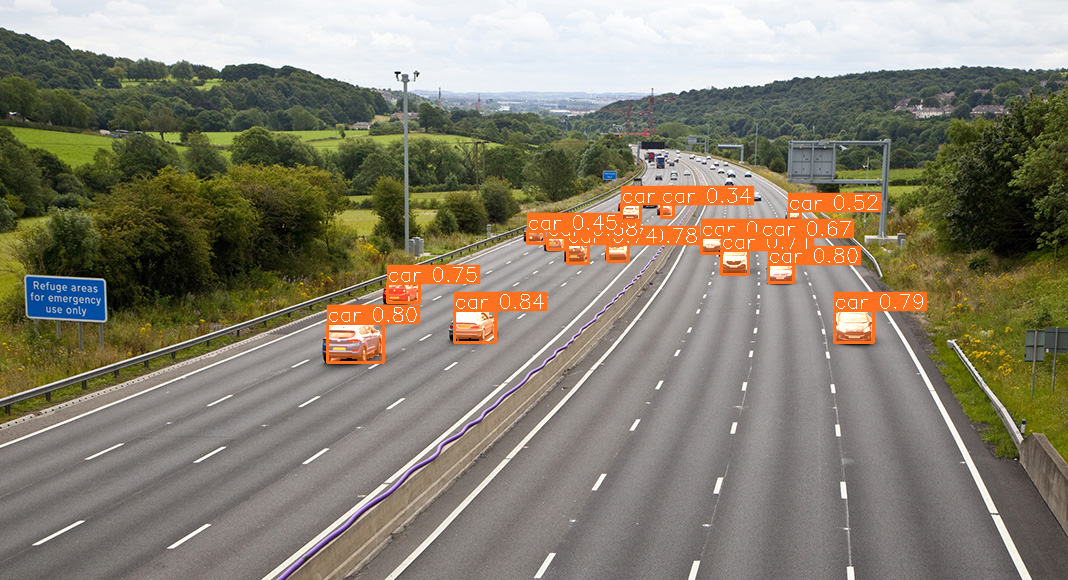

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model_seg,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


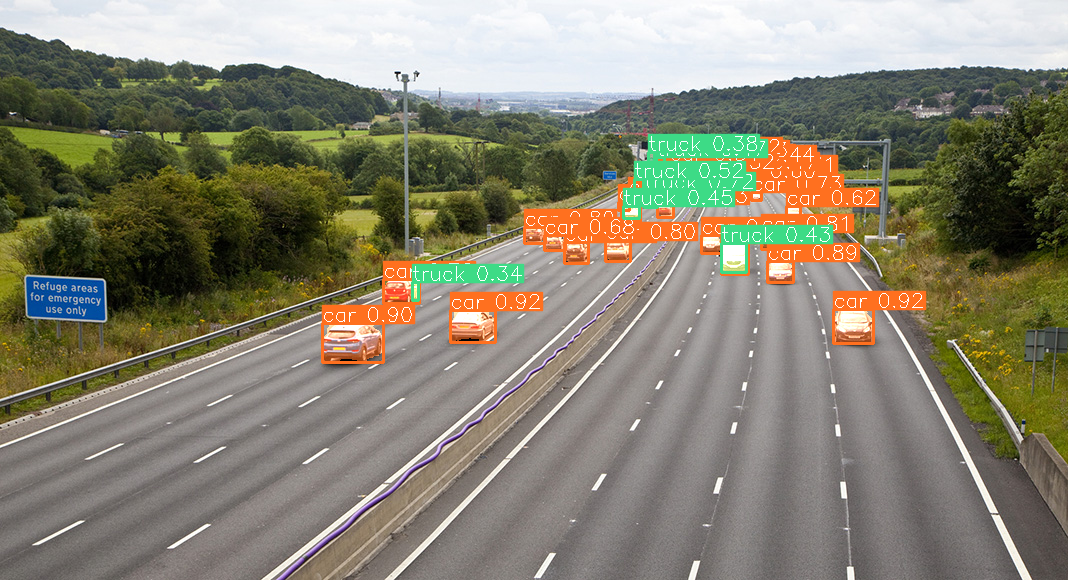

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [ ]:
object_prediction_list = result.object_prediction_list
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(833, 309, 873, 343), w: 40, h: 34>,
    mask: <sahi.annotation.Mask object>,
    score: PredictionScore: <value: 0.9211080074310303>,
    category: Category: <id: 2, name: car>>

In [ ]:
object_prediction_list[0].mask.segmentation

[[837,
  313,
  836,
  313,
  836,
  315,
  835,
  316,
  835,
  317,
  835,
  318,
  834,
  319,
  833,
  320,
  833,
  336,
  834,
  337,
  834,
  338,
  834,
  339,
  835,
  340,
  835,
  341,
  836,
  342,
  837,
  342,
  841,
  342,
  846,
  342,
  863,
  342,
  864,
  343,
  869,
  343,
  870,
  343,
  871,
  342,
  871,
  340,
  872,
  340,
  872,
  339,
  873,
  338,
  873,
  323,
  873,
  321,
  873,
  320,
  872,
  319,
  872,
  318,
  871,
  318,
  866,
  313,
  867,
  312,
  865,
  310,
  863,
  310,
  862,
  309,
  841,
  309,
  840,
  309,
  839,
  310,
  839,
  311,
  838,
  311,
  838,
  312]]

Sliced predictions are much better

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|                                                | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  33%|█████████████▎                          | 1/3 [00:01<00:03,  1.74s/it]

Prediction time is: 1615.49 ms
Performing prediction on 15 slices.


Performing inference on images:  67%|██████████████████████████▋             | 2/3 [00:03<00:01,  1.70s/it]

Prediction time is: 1593.49 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|████████████████████████████████████████| 3/3 [00:05<00:00,  1.86s/it]

Prediction time is: 2070.87 ms
Prediction results are successfully exported to runs/predict/exp9
